In [8]:
import pickle
import numpy as np

In [9]:
from xgboost import XGBClassifier

In [10]:
model = XGBClassifier()
model.load_model('xgb_model.json')

In [11]:
input_data = np.array([[1, 100, 20, 170]])

In [12]:
pred = model.predict(input_data)

In [13]:
p = pred[0]

In [14]:
p

1

In [15]:
print(pred[0])

1


In [16]:
import shap

In [17]:
explainer = shap.TreeExplainer(model)
explanation = explainer(input_data)

shap_values = explanation.values
np.abs(shap_values.sum(axis=1) + explanation.base_values - pred).max()

3.168156623840332

In [18]:
shap_values

array([[ 2.5350437 , -0.98667204,  4.106215  , -1.4684002 ]],
      dtype=float32)

In [19]:
shap.initjs()

In [20]:
shap.force_plot(explainer.expected_value, shap_values[0,:], input_data)

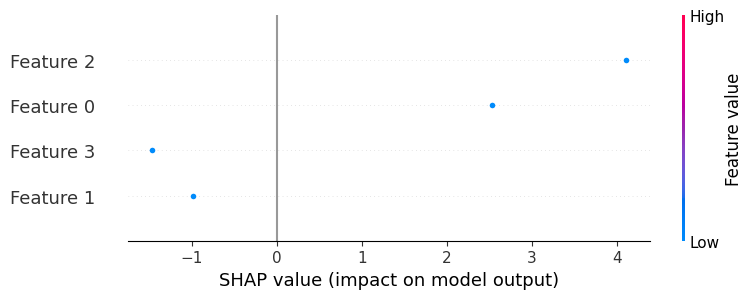

In [21]:
shap.summary_plot(shap_values, input_data)

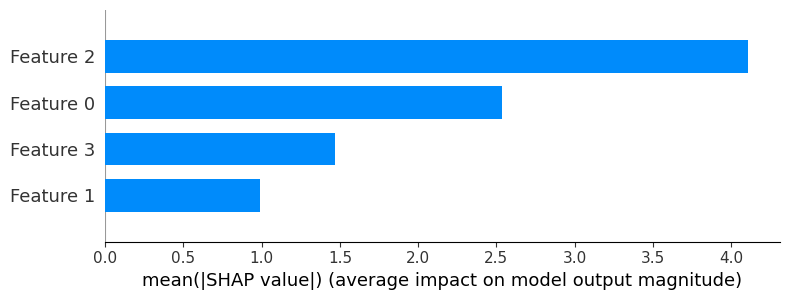

In [22]:
shap.summary_plot(shap_values, input_data, plot_type="bar")

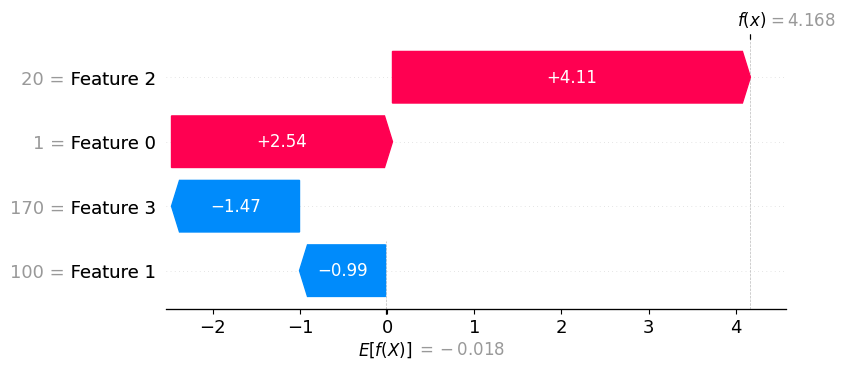

In [23]:
shap.plots.waterfall(explanation[0])

In [24]:
explanation

.values =
array([[ 2.5350437 , -0.98667204,  4.106215  , -1.4684002 ]],
      dtype=float32)

.base_values =
array([-0.01803022], dtype=float32)

.data =
array([[  1, 100,  20, 170]])

In [25]:
# Define project information
PROJECT_ID = "tonal-apex-415517"
LOCATION = "us-central1"

# Initialize Vertex AI
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

In [31]:
from vertexai.generative_models import (
    GenerationConfig,
    GenerativeModel,
    Image
)

In [27]:
model = GenerativeModel("gemini-1.0-pro-vision")

In [29]:
responses = model.generate_content("Why is sky blue?", stream=True)

for response in responses:
    print(response.text, end="")

The sky appears blue because of a phenomenon called Rayleigh scattering. 

1. **Sunlight and the visible spectrum:** Sunlight is composed of various wavelengths of light, which our eyes perceive as different colors. The visible spectrum ranges from red (long wavelengths) to violet (short wavelengths).

2. **Rayleigh scattering:** When sunlight enters Earth's atmosphere, it encounters particles such as molecules of nitrogen and oxygen. The size of these particles is smaller than the wavelength of visible light.

3. **Scattering of light:** As sunlight interacts with these particles, it undergoes Rayleigh scattering. This scattering causes the shorter wavelength components of light (blue and violet) to be scattered more strongly than longer wavelength components (red).

4. **Blue sky:** The scattered blue and violet light is redirected in all directions, creating the illusion of a blue sky. Since blue light is scattered more effectively than other colors, it dominates the sky's appearanc

In [ ]:
generation_config = GenerationConfig(
    temperature=0.9,
    top_p=1.0,
    top_k=32,
    candidate_count=1,
    max_output_tokens=2048,
)

responses = model.generate_content(
    "Why is the sky blue?",
    generation_config=generation_config,
    stream=True,
)

for response in responses:
    print(response.text, end="")

In [36]:
IMAGE_FILE = "waterfall_op.png"
image = Image.load_from_file(IMAGE_FILE)

generative_multimodal_model = GenerativeModel("gemini-1.0-pro-vision")
response = generative_multimodal_model.generate_content(["What is shown in this image? explain in short", image])

print(response.text)

 The image shows a SHAP summary plot. It shows how each feature contributes to the prediction of a model. The model is a linear regression model, and the features are the values of four different variables. The plot shows that the most important feature is "Feature 2", followed by "Feature 0", "Feature 3", and "Feature 1". The plot also shows that the model is predicting a positive value.
